<a href="https://colab.research.google.com/github/zoichatzi/linearScalableOutlierDetect/blob/main/images/project1_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preperation and Visualization of the Data


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


### 1. Import of the data to dfs.

In [3]:
# read the data
import pandas as pd
import numpy as np

traindf = pd.read_table("gdrive/MyDrive/data/data-example2122-pms.txt", index_col = None, sep = ",", header = None)

### 2. Scatter plot to visualize the dataset.

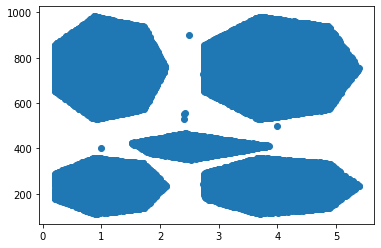

In [4]:
import matplotlib.pyplot as plt

plt.scatter(traindf.loc[:,0], traindf.loc[:,1])


### 3. Outliers detected by the workflow.
In this section we are visualizing the outliers that detected by the workflow.

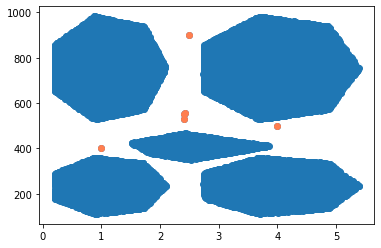

In [5]:
plt.scatter(traindf.loc[:,0], traindf.loc[:,1])

x = [4, 2.4, 2.42, 2.41, 2.5, 1.00]
y = [500, 550, 555, 530, 900, 400]

plt.scatter(x, y, c='coral')

### 4. Normalized data
Part of the preprocessing is the normalization of the data using a Min Max scaler. 


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
newdf = scaler.fit_transform(traindf)


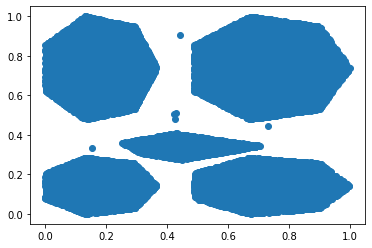

In [7]:
plt.scatter(newdf[:,0], newdf[:,1])

### 5. Sample the data (25%, 50%, 200%, 400%)
In order to check the scalability of the run time of our approach we are going to test it to subsets and supersets of the original data set. Ιn particular, the performance of our method will be tested in two different categories where random points have been removed or added respectively. The sets will constitute:
- A quarter of the original set (25%)
- Half of the original set (50%)
- Twice the original (200%)
- Four times the original (400%)

In [ ]:
# Sample dataset

traindf.sample(frac=0.5, replace=False).to_csv("gdrive/MyDrive/data/data-example2122-pms-0_5.txt", header = False, index = False)

traindf.sample(frac=0.25, replace=False).to_csv("gdrive/MyDrive/data/data-example2122-pms-0_25.txt", header = False, index = False)

traindf.sample(frac=2, replace=True).to_csv("gdrive/MyDrive/data/data-example2122-pms-2.txt", header = False, index = False)

traindf.sample(frac=4, replace=True).to_csv("gdrive/MyDrive/data/data-example2122-pms-4.txt", header = False, index = False)


### 6. Plot the new data-sets
Plot of the 50% subset.

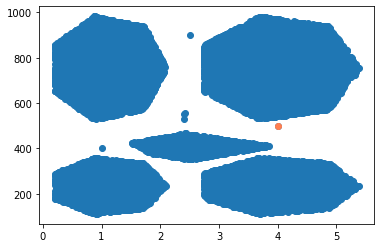

In [8]:
train0_50 = pd.read_table("gdrive/MyDrive/data/data-example2122-pms-0_5.txt", index_col = None, sep = ",", header = None)

plt.scatter(train0_50.loc[:,0], train0_50.loc[:,1])

x = [4]
y = [500]

plt.scatter(x, y, c='coral')

Plot of the 25% subset.

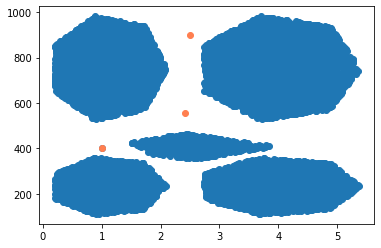

In [ ]:
train0_25 = pd.read_table("gdrive/MyDrive/data/data-example2122-pms-0_25.txt", index_col = None, sep = ",", header = None)

plt.scatter(train0_25.loc[:,0], train0_25.loc[:,1])

x = [2.42, 2.5, 1]
y = [555,  900, 400]

plt.scatter(x, y, c='coral')

### 7. Execution time
Ploting the run time of each idividual datatset.

Text(0.5, 0, 'Original dataset fraction')

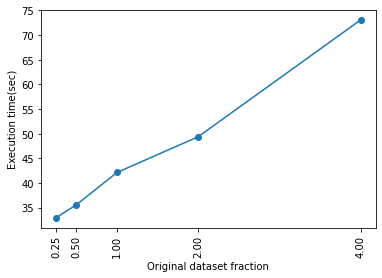

In [ ]:
x = [0.25, 0.5, 1, 2, 4]
y = [32.941732741,  35.566625094, 42.109486233, 49.346912155, 73.020051405]

plt.plot(x, y)

plt.scatter(x, y)
plt.xticks(x, rotation = 90)

plt.ylabel("Execution time(sec)")
plt.xlabel("Original dataset fraction")

### 8. Testing on an additional dataset
In order to examine the functionality of the present algorithm in a different set and simotenusely to examine the performance of this approach in terms of accuracy and recall, we will test it in a dataset for which we know the grand truth.
This set consists of **876 items** which are divided into 2 clusters (pink and purple). The dataset has **9 pre-marked ectopic points** which are marked in blue-green color.

In [9]:
outliers = pd.read_csv("gdrive/MyDrive/outliers (1).csv",index_col=None, sep="," )
print(outliers)

              x           y  color
0    355.297197  148.880238      1
1    402.111403  244.566989      1
2    383.443863  224.191167      1
3    424.774071  207.348790      1
4    398.722062  214.262629      1
..          ...         ...    ...
871  415.875140  206.499233      1
872  155.897677  171.026796      0
873  187.015041  165.161886      0
874  465.867267  278.237445      1
875  423.187672  218.991343      1

[876 rows x 3 columns]


Plot the data to scatter plot with different colors pre cluster. The outliers are presented in a diferent color as well.


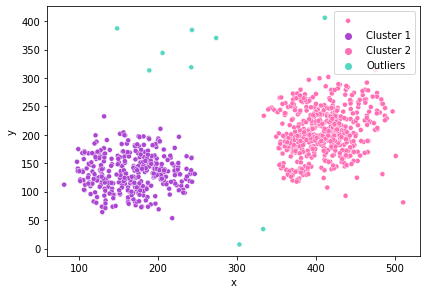

In [22]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
COLORS = [ '#AB46D2', '#FF6FB5', '#55D8C1', '#FCF69C', '#733C3C', '#B22727', '#B4ECE3', '#FFF8D5', '#FFBD35', '#3FA796', '#8267BE', '#502064', '#FF5D9E', '#8F71FF', '#82ACFF', '#8BFFFF', '#3E3838', '#AE7C7C', '#6CBBB3', '#EFE784', '#072227', '#35858B', '#4FBDBA', '#AEFEFF', '#4B5D67', '#322F3D', '#59405C', '#87556F']
fig =plt.plot()
plt.tight_layout()
color_cnt = len(outliers['color'].unique())
ax = sns.scatterplot(data = outliers, x='x', y='y', hue='color', palette =COLORS[:3], s=25)
ax.legend(['', 'Cluster 1', 'Cluster 2','Outliers'])
plt.show()